<a id='home'></a>
# Intro
<p>&nbsp; &nbsp; &nbsp;  </p>
<p> The purpose of this document is to have an initial look at the content of the [Tech in Asia Website](https://www.techinasia.com/). </p>
<p> This document is divided into two main sections: Processing of the Content & Analysis </p>
#### <p> 1. Processing of the Content </p>
<p> The main focus of this section is to get the data, clean it, add some features, and get familiar with it through a series of exploratory analysis. Some of the highlights are:
<br>&nbsp; \* Videos are about 9% of the content sample
<br>&nbsp; \* Videos tend to get less comments (50% less)
</p>
<p></p>
#### <p> 2. Analysis </p>
<p> The analysis section looks at different way to get insights from data as well as provides a tool for content recommendation. 
<br>&nbsp; \* Startup, community, news are the most popular tags (popularity measured by the number of comments
<br>&nbsp; \* 39.8%  of Staff articles had comments.
<br>&nbsp; \* 55.6% of Non-staff articles had comments.
<br>&nbsp; \* Non-staff articles were longer by: 57.0% and had on average almost 1 comment more
<br>&nbsp; \* The analysis section contains an article recommender that recommends similar articles based on content or title
<br>&nbsp; \* Finally, Andre Gunawan had the most lexically diverse articles (among writers with 4 or more articles
</p> 
<p> </p>
## Table of Content
<p> </p>
<dl>
    <dt>1. Processing of the Content.</dt>
    <dd> &nbsp; &nbsp;    1.1 [Upload of the Document](#document_uploads)</dd>
    <dd> &nbsp; &nbsp;    1.2 [Cleaning the Content](#clean_content)</dd>
    <dd> &nbsp; &nbsp;    1.3 [Quick Extraction and Check of Variables](#quick_check)</dd>
    <dd> &nbsp; &nbsp;    1.4 [Couple More Extractions](#more_extractions)</dd>
    <p> </p>
    <dt>2. Analysis.</dt>
    <dd>&nbsp; &nbsp;    2.1 [Most Popular Document Tags](#most_popular_tags)</dd>
    <dd>&nbsp; &nbsp;    2.2 [NLP](#nlp)</dd>
    <dd>&nbsp; &nbsp; &nbsp; &nbsp;  2.2.1 [Top K Features of the Title and Content](#top_k_features)</dd>
    <dd>&nbsp; &nbsp; &nbsp; &nbsp;  2.2.2 [Title and Content Recommendations](#recommendations)</dd>
    <dd>&nbsp; &nbsp; &nbsp; &nbsp;  2.2.3 [Checking Titles and Content](#check_title_content)</dd>
    <dd>&nbsp; &nbsp; &nbsp; &nbsp;  2.2.4 [Checking Keywords](#checking_keywords)</dd>
    <p> </p>
</dl>


### Upload of the Documents  <a id='document_upload'></a>
In general, this section deals with getting the data of the web to the computer. 
This was a cool section as you had to set up the user-agent to "trick" the API (cool riddle). 


In [6]:
import urllib.parse
import urllib.request
import pandas as pd
from time import sleep
import json

In [7]:
pages_count = 30
articles=pd.DataFrame()
#Loop Range 
url = 'https://www.techinasia.com/wp-json/techinasia/2.0/posts?page='
    
for i in range(pages_count): 
    i_str = str(i + 1)
    full_url = url + i_str + '&per_page=30'
    try:
        headers = {}
        headers['User-Agent'] = "Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.27 Safari/537.17"
        req = urllib.request.Request(full_url, headers = headers)
        resp = urllib.request.urlopen(req)
        respData3 = resp.read()
        d = json.loads(respData3)
        df = pd.DataFrame(d['posts'])
        articles=articles.append(df,ignore_index=True)  
    except Exception as e:
        print(str(e))
    sleep(0.02)

In [8]:
articles.size

23400

In [9]:
articles2 = articles.copy()

<a id='clean_content'></a>

### Cleaning the Content
The content of the article has html formatting which can be quickly cleaned with html2text. 
The true pain are the links in the text. The clean_links function tried to remove as much as possible. I am sure that TIA has more standard elements that can be cleaned. The cleaning process should be standardised and automated. 

In [10]:
# What Columns do we have?
list(articles2)

['author',
 'categories',
 'comment_status',
 'comments',
 'comments_count',
 'companies',
 'content',
 'date_gmt',
 'editor',
 'excerpt',
 'external_scripts',
 'featured_image',
 'id',
 'is_sponsored',
 'link',
 'mobile',
 'modified_gmt',
 'permissions',
 'read_time',
 'seo',
 'slug',
 'sponsor',
 'status',
 'tags',
 'title',
 'type']

In [11]:
import html2text
import re

In [12]:
h = html2text.HTML2Text()
h.ignore_links = True # Ignore converting links from HTML

In [13]:
def clean_links(test_str):
    ret = ''
    skip1c = 0
    skip2c = 0
    for i in test_str:
        if i == '[':
            skip1c += 1
        elif i == '(':
            skip2c += 1
        elif i == ']' and skip1c > 0:
            skip1c -= 1
        elif i == ')'and skip2c > 0:
            skip2c -= 1
        elif skip1c == 0 and skip2c == 0:
            ret += i
    return ret

In [14]:
articles2['content2'] = articles2['content'].apply(lambda x: clean_links(h.handle(x)))

In [15]:
# A lot of the extra stuff will be removed during the NLP section. For now, it is functional
print(articles2.content2[22])



!

On the weekend, villagers flock to the center of Kang County to shop, dine, or
pick up their express deliveries. Photo credit: Tech in Asia

Five years ago, Ji Yongtao left Shenzhen – China’s coastal metropolis that
recently became the country’s third-largest economic hub – and returned to his
hometown, located in the far-flung northwestern Gansu province. Every few
days, Ji takes a 10-minute drive to fetch his online orders from Kang County’s
Rural Taobao station, a brick-and-mortar service center that Alibaba has
established nationwide to help rural residents buy and sell goods online.

“When I first moved back, the county had no courier service. Ecommerce was
unheard of here. I had to drive 200 kilometers to the nearest city of Tianshui
to pick up my packages,” says Ji. “But now, villagers are embracing online
shopping faster than I thought.”

But Ji’s story is not unique. Outside of China’s megacities, ecommerce is
taking off across low-tier cities – tiny urban enclaves with l

<a id='quick_check'></a>

### Quick Extraction and Check of Variables 
Setting some flags and doing some quick data checks to make sure that everything looks normal


In [16]:
articles2['content_len'] = articles2.apply(lambda row: len(row['content2']), axis=1)

#### Video Flag will be important when dealing with the article recommender and some analysis of comments

In [17]:
def f(x):
    #print (x)
    if x == 'Video':
        return 1
    else:
        return 0

articles2['video_flag'] = articles2.title.str[:5].apply(f)
#print (articles2[['title', 'video_flag']])

In [18]:
articles2.describe() 

,comments_count,read_time,content_len,video_flag
count,900.000000,900.000000,900.000000,900.000000
mean,1.571111,3.787778,4599.804444,0.087778
std,4.259446,2.297763,3338.799751,0.283129
min,0.000000,1.000000,39.000000,0.000000
25%,0.000000,2.000000,2176.750000,0.000000
50%,0.000000,3.000000,4112.500000,0.000000
75%,2.000000,5.000000,6494.750000,0.000000
max,74.000000,24.000000,25736.000000,1.000000


In [19]:
# 80 articles were videos
articles2[(articles2['video_flag'] == 0)].describe()

,comments_count,read_time,content_len,video_flag
count,821.000000,821.000000,821.000000,821.0
mean,1.649208,4.056029,5028.539586,0.0
std,4.428975,2.228809,3181.882698,0.0
min,0.000000,1.000000,276.000000,0.0
25%,0.000000,2.000000,2698.000000,0.0
50%,0.000000,4.000000,4482.000000,0.0
75%,2.000000,5.000000,6770.000000,0.0
max,74.000000,24.000000,25736.000000,0.0


#### <p> Videos tend to get less comments. Read time is always '1'. However, this could be adjusted for the duration of the video (if that variable exists)
</p>

In [20]:
articles2[(articles2['video_flag'] == 1)].describe()

,comments_count,read_time,content_len,video_flag
count,79.000000,79.0,79.000000,79.0
mean,0.759494,1.0,144.215190,1.0
std,1.469477,0.0,75.730743,0.0
min,0.000000,1.0,39.000000,1.0
25%,0.000000,1.0,96.000000,1.0
50%,0.000000,1.0,117.000000,1.0
75%,1.000000,1.0,181.500000,1.0
max,7.000000,1.0,514.000000,1.0


### Nothing shocking here. Read_time and content_len are closely correlated. Video flag and read_time and conent_len are inversely correlated. Nothing interesting/significant for the rest

In [21]:
correlation = articles2.corr(method='pearson')
correlation

,comments_count,is_sponsored,read_time,content_len,video_flag
comments_count,1.000000,-0.025034,0.014671,-0.017395,-0.059140
is_sponsored,-0.025034,1.000000,0.094682,0.064023,-0.050235
read_time,0.014671,0.094682,1.000000,0.962178,-0.376562
content_len,-0.017395,0.064023,0.962178,1.000000,-0.414189
video_flag,-0.059140,-0.050235,-0.376562,-0.414189,1.000000


In [22]:
# Just Articles (No Videos)
correlation2 = articles2[(articles2['video_flag'] == 0)].corr(method='pearson')

In [23]:
# Numbers stay about the same
correlation2

,comments_count,is_sponsored,read_time,content_len,video_flag
comments_count,1.000000,-0.028236,-0.008260,-0.046295,NaN
is_sponsored,-0.028236,1.000000,0.081888,0.047542,NaN
read_time,-0.008260,0.081888,1.000000,0.956166,NaN
content_len,-0.046295,0.047542,0.956166,1.000000,NaN
video_flag,NaN,NaN,NaN,NaN,NaN


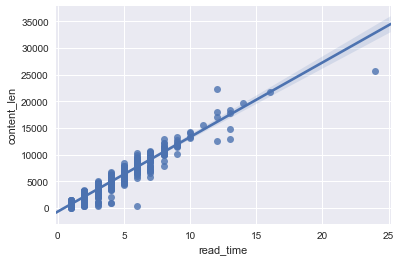

In [24]:
# As predicted by the correlation, the relationship between the read_time and content_len is highly linear
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
short = articles2[['read_time','content_len']]
ax = sns.regplot(x="read_time", y="content_len", data=short)
plt.show()

In [25]:
articles_copy = articles2.copy()

<a id='more_extractions'></a>

### Couple More Extractions
#### Author Info


In [26]:
articles_copy.author[1]

{'author_url': 'https://www.techinasia.com/profile/michele-ferrario',
 'avatar_url': 'https://cdn.techinasia.com/wp-content/authors/175923.jpg?v=1517533873',
 'comments_count': 0,
 'description': 'Co-founder &amp; CEO at StashAway. Dedicated to redefining investing and wealth creation in APAC. Ex-CEO of ZALORA. Member of the Committee for the Future of the Economy. Columbia Business School MBA.',
 'display_name': 'Michele Ferrario',
 'first_name': 'Michele',
 'id': '175923',
 'id_techinasia': '175923',
 'last_name': 'Ferrario',
 'roles': ['Member']}

In [27]:
articles_copy['author_name'] = articles_copy['author'].apply(lambda x: x.get('display_name'))
articles_copy['author_id'] = articles_copy['author'].apply(lambda x: x.get('id_techinasia'))
articles_copy['author_comments'] = articles_copy['author'].apply(lambda x: x.get('comments_count'))
articles_copy['author_role'] = articles_copy['author'].apply(lambda x: x.get('roles'))

#### Sponsor

In [28]:
articles_copy.sponsor[3]

{'link': None, 'logo': None, 'name': None}

In [29]:
articles_copy['sponsor_name'] = articles_copy['sponsor'].apply(lambda x: x.get('name'))

#### Continue with Content

In [30]:
def tokee(row):
    return [t for t in row.split()] 
articles_copy['text'] = articles_copy.apply(lambda row: tokee(row['content2']), axis=1)

In [31]:
#articles_copy['text']

<a id='most_popular_tags'></a>
## Analysis
<p> 

</p>

### Most Popular Tags By Comment Count

<p> 

</p>


In [32]:
articles_copy['tag_count'] = articles_copy.apply(lambda row: len(row['categories']), axis=1)

In [33]:
def get_cats(categories):
    s = ''
    for y in range(len(categories)): 
        s += (categories[y]['name']) + " "
    return s.rstrip()

In [34]:
articles_copy['tags2'] = articles_copy.apply(lambda row: tokee(get_cats(row['categories'])), axis=1)
articles_copy[['tags2','tag_count']][0:10]

,tags2,tag_count
0,"[Asia, News, Summary]",3
1,"[Community, Online, Segments]",2
2,"[E-commerce, News, Social, Media]",3
3,"[Conference, Events]",2
4,"[Asia, Community, E-commerce]",3
5,"[Features, Profiles, Startups]",3
6,"[Asia, News, Summary]",3
7,"[Asia, Community, E-commerce, Startup, Ecosystem]",4
8,"[Asia, News, Summary]",3
9,"[Features, Transportation]",2


In [35]:
type(articles_copy['tags2'])

pandas.core.series.Series

In [36]:
articles_copy2 = articles_copy.copy()

In [37]:
import numpy as np

In [38]:
# Borrowed from: https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
def explode(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, df[lst_cols[0]].str.len())
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, df[lst_cols[0]].str.len())
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

In [39]:
articles_copy2.tags2[:1]

0    [Asia, News, Summary]
Name: tags2, dtype: object

In [40]:
articles_copy2_ex = explode(articles_copy2, ['tags2'], fill_value='')

In [41]:
articles_copy2_ex.head()

,author,categories,comment_status,comments,comments_count,companies,content,date_gmt,editor,excerpt,...,content_len,video_flag,author_name,author_id,author_comments,author_role,sponsor_name,text,tag_count,tags2
0,"{'id': '124235', 'id_techinasia': '124235', 'f...","[{'id': '123', 'name': 'Asia', 'slug': 'asia'}...",open,[],0,[],"<div id=""attachment_391455"" class=""wp-caption ...",2018-02-26T10:00:19,Editing by Eileen C. Ang,A roundup of some of the region’s top tech hea...,...,4682,0,Jack Ellis,124235,15,[Staff],None,"[!, Photo, credit:, Mobike, Here, are, your, A...",3,Asia
1,"{'id': '124235', 'id_techinasia': '124235', 'f...","[{'id': '123', 'name': 'Asia', 'slug': 'asia'}...",open,[],0,[],"<div id=""attachment_391455"" class=""wp-caption ...",2018-02-26T10:00:19,Editing by Eileen C. Ang,A roundup of some of the region’s top tech hea...,...,4682,0,Jack Ellis,124235,15,[Staff],None,"[!, Photo, credit:, Mobike, Here, are, your, A...",3,News
2,"{'id': '124235', 'id_techinasia': '124235', 'f...","[{'id': '123', 'name': 'Asia', 'slug': 'asia'}...",open,[],0,[],"<div id=""attachment_391455"" class=""wp-caption ...",2018-02-26T10:00:19,Editing by Eileen C. Ang,A roundup of some of the region’s top tech hea...,...,4682,0,Jack Ellis,124235,15,[Staff],None,"[!, Photo, credit:, Mobike, Here, are, your, A...",3,Summary
3,"{'id': '175923', 'id_techinasia': '175923', 'f...","[{'id': '43226', 'name': 'Community', 'slug': ...",open,[],0,[],<p><em><strong>NOTE:</strong></em><strong> </s...,2018-02-26T08:04:16,,"Before co-founding StashAway, Michele was the ...",...,1859,0,Michele Ferrario,175923,0,[Member],None,"[_, **NOTE:**_, ******_This, AMA, will, be, li...",2,Community
4,"{'id': '175923', 'id_techinasia': '175923', 'f...","[{'id': '43226', 'name': 'Community', 'slug': ...",open,[],0,[],<p><em><strong>NOTE:</strong></em><strong> </s...,2018-02-26T08:04:16,,"Before co-founding StashAway, Michele was the ...",...,1859,0,Michele Ferrario,175923,0,[Member],None,"[_, **NOTE:**_, ******_This, AMA, will, be, li...",2,Online


In [42]:
pd.set_option('display.max_rows', 500)

In [43]:
# Article tags that got the highest number of comments
popular_tags = articles_copy2_ex.groupby(["tags2"])["comments_count"].nlargest(3)
popular_tags

tags2                     
Acquisitions          459      7
                      902      5
                      2699     4
Announcements         2358    21
                      1369    13
                      334      2
Artificial            635      4
                      706      3
                      494      1
Asia                  2280    33
                      1741    14
                      1129     6
Branded               860      7
                      638      4
                      2385     3
Brief                 2169     7
                      2609     5
                      2302     3
Business-to-business  1606    12
                      622      1
                      239      0
Community             818     50
                      2281    33
                      2284    33
Conference            1719    15
                      418      5
                      1722     5
Consumer              1143     7
                      640      4
                

In [44]:
tags_agre = articles_copy2_ex[['tags2','comments_count'
              ]].groupby(['tags2'
                         ]).agg(['sum','mean','max', 'count'])
tags_agre

comments_count                     
                                sum       mean max count
tags2                                                   
Acquisitions                     17   1.888889   7     9
Announcements                    36   9.000000  21     4
Artificial                       12   0.521739   4    23
Asia                            156   0.923077  33   169
Branded                          21   0.913043   7    23
Brief                            26   1.238095   7    21
Business-to-business             13   2.166667  12     6
Community                       484   2.315789  50   209
Conference                       54   1.173913  15    46
Consumer                         15   2.142857   7     7
Content                          21   0.913043   7    23
Cryptocurrencies                 85   1.491228  15    57
Data                              7   0.636364   3    11
Design                            8   1.333333   3     6
Development                      11   2.200000   5     5
Digital                          11   1.375000   5     8
E-commerce                      179   1.988889  33    90
Ecosystem                        15   0.937500   4    16
Engineering                      52   1.925926  11    27
Enterprises                       3   0.750000   3     4
Events                           33   0.916667   6    36
Exclusives                       11   1.222222   9     9
Featured                        357   2.625000  33   136
Features                        101   1.311688  15    77
Fintech                         111   1.460526  18    76
Gadgets                          37   1.370370   7    27
Gaming                           11   0.611111   4    18
GreenTech                         0   0.000000   0     4
Intelligence                     12   0.521739   4    23
Internet                         16   0.592593   3    27
Investments                     186   1.120482  14   166
Lists                            95   4.750000  42    20
Management                       20   1.333333   4    15
Marketing                        11   1.375000   5     8
Media                            47   1.119048  15    42
Mobile                           85   2.361111  12    36
News                            416   1.034826  18   402
Online                          124  41.333333  74     3
Opinion                         219   2.517241  14    87
Product                          12   1.000000   4    12
Profiles                         78   1.322034   8    59
Q&A                              35   1.296296   9    27
Recruitment                      72   3.428571  42    21
Robotics                          8   0.400000   3    20
Segments                        124  41.333333  74     3
Social                           45   1.451613  15    31
Startup                          15   0.937500   4    16
Startups                        514   1.511765  33   340
Stories                         209   2.458824  18    85
Summary                          17   0.200000   5    85
Tech                             15   2.142857   7     7
Tips                            175   1.635514  15   107
Transportation                   83   1.317460  11    63
Videos                           26   0.812500   7    32
Web                              11   2.200000   5     5
science                           7   0.636364   3    11

In [45]:
#tags_agre['comments_count', 'sum']

In [46]:
df = tags_agre['comments_count', 'sum'].to_frame().reset_index()
df.columns = df.columns.droplevel(0)
df.columns = ['tags', 'sum_comments']
list(df)


['tags', 'sum_comments']

In [47]:
test = df.sort_values(['sum_comments'], ascending=[False])
test

,tags,sum_comments
47,Startups,514
7,Community,484
36,News,416
22,Featured,357
38,Opinion,219
48,Stories,209
30,Investments,186
16,E-commerce,179
51,Tips,175
3,Asia,156


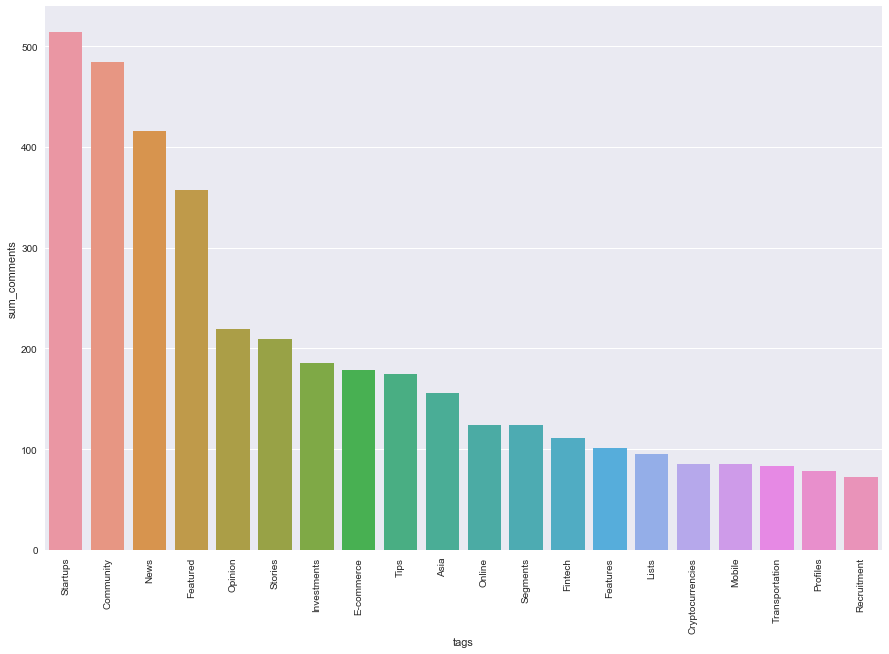

In [48]:
import seaborn as sns
plt.subplots(figsize=(15,10))
sns.set_style("whitegrid")
sns.set(font_scale=1.9)
ax = sns.barplot(x="tags", y="sum_comments", data=test[:20]) 
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [49]:
def role(x): 
    for z in x: 
        if z == 'Staff': 
            return 1
        else: 
            return 0
articles_copy['staff_flag'] = articles_copy.apply(lambda row: role(row['author_role']), axis=1)

In [50]:
# Seems like the staff gets less comments 
# Non-staff gets almost 2x more comments
# Wonder Why we see this? (Sample data, promotion by non-staff)
articles_copy[['staff_flag','video_flag', 'comments_count','content_len'
              ]].groupby(['staff_flag','video_flag'
                         ]).agg(['sum','mean','max', 'count'])

comments_count                     content_len  \
                                 sum      mean max count         sum   
staff_flag video_flag                                                  
0          0                     619  2.335849  74   265     1762405   
1          0                     735  1.321942  42   556     2366026   
           1                      60  0.759494   7    79       11393   

                                                 
                              mean    max count  
staff_flag video_flag                            
0          0           6650.584906  19722   265  
1          0           4255.442446  25736   556  
           1            144.215190    514    79

In [51]:
# The gap is snaller once we remove the videos and compare just the articles 
articles_copy_x = articles_copy[articles_copy.comments_count > 0]
articles_copy_x[['staff_flag','video_flag', 'comments_count','content_len'
              ]].groupby(['staff_flag','video_flag'
                         ]).agg(['sum','mean','max', 'count'])

comments_count                     content_len  \
                                 sum      mean max count         sum   
staff_flag video_flag                                                  
0          0                     619  4.182432  74   148     1025712   
1          0                     735  3.340909  42   220      961455   
           1                      60  2.142857   7    28        3853   

                                                 
                              mean    max count  
staff_flag video_flag                            
0          0           6930.486486  19722   148  
1          0           4370.250000  21718   220  
           1            137.607143    260    28

In [52]:
staff = 221/555*100
non_staff = 148/266*100
dif_len = (6658.763158 - 4241.536101) / 4241.536101 * 100
print("")
print(str(round(staff,1)) + "% " + " of Staff articles had comments.")
print(str(round(non_staff,1)) + "% " + "of Non-staff articles had comments.")
print("Non-staff articles were longer by: " + str(round(dif_len,1)) + "%")


39.8%  of Staff articles had comments.
55.6% of Non-staff articles had comments.
Non-staff articles were longer by: 57.0%


<a id='nlp'></a>
## NLP
<p> This section looks at some natural language processing. The main objectives here is to get an article recommender based on the key words. You can recommend an article based on the title or the content of the article. This is done via k-nn.  </p>

In [53]:
# You might have to download some nltk libraries 
# import nltk
# nltk.download()

In [54]:
import string
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

In [55]:
# I just want the articles
samp = articles_copy[articles_copy.video_flag == 0]

In [56]:
def clean_text(text):
    stop_words = ['\x0c', '\n']
    for i in stop_words:
        text.replace(i, ' ')
    clean_text = re.sub('[^a-zA-Z]+', ' ', text)
    return clean_text.lower()

In [57]:
# Create a column for cleaned Content and cleaned Title (I know, I should use .loc)
samp['clean_content'] = samp['content2'].apply(clean_text)
samp['clean_title'] = samp['title'].apply(clean_text)

/Users/Michal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Michal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
samp.head()

,author,categories,comment_status,comments,comments_count,companies,content,date_gmt,editor,excerpt,...,author_id,author_comments,author_role,sponsor_name,text,tag_count,tags2,staff_flag,clean_content,clean_title
0,"{'id': '124235', 'id_techinasia': '124235', 'f...","[{'id': '123', 'name': 'Asia', 'slug': 'asia'}...",open,[],0,[],"<div id=""attachment_391455"" class=""wp-caption ...",2018-02-26T10:00:19,Editing by Eileen C. Ang,A roundup of some of the region’s top tech hea...,...,124235,15,[Staff],None,"[!, Photo, credit:, Mobike, Here, are, your, A...",3,"[Asia, News, Summary]",1,photo credit mobike here are your asia tech n...,asia news roundup kakao mobility gets m mobike...
1,"{'id': '175923', 'id_techinasia': '175923', 'f...","[{'id': '43226', 'name': 'Community', 'slug': ...",open,[],0,[],<p><em><strong>NOTE:</strong></em><strong> </s...,2018-02-26T08:04:16,,"Before co-founding StashAway, Michele was the ...",...,175923,0,[Member],None,"[_, **NOTE:**_, ******_This, AMA, will, be, li...",2,"[Community, Online, Segments]",0,note this ama will be live on tuesday februar...,upcoming i m michele ferrario co founder and ...
2,"{'id': '124235', 'id_techinasia': '124235', 'f...","[{'id': '3886', 'name': 'E-commerce', 'slug': ...",open,[],0,[{'id': '13eeafa3-6981-40c4-aa7f-61b434b24d39'...,"<div id=""attachment_471034"" class=""wp-caption ...",2018-02-26T07:16:25,Editing by Judith Balea and Terence Lee,But the Singaporean startup may have a few tri...,...,124235,15,[Staff],None,"[!, Carousell, CEO, Quek, Siu, Rui, and, Faceb...",3,"[E-commerce, News, Social, Media]",1,carousell ceo quek siu rui and facebook ceo m...,facebook s buy and sell marketplace could be a...
3,"{'id': '154659', 'id_techinasia': '154659', 'f...","[{'id': '36954', 'name': 'Conference', 'slug':...",open,[],0,[],"<p><img src=""https://cdn.techinasia.com/wp-con...",2018-02-26T03:16:25,Editing by Cheong Hui Min,We bring you another batch of homegrown startu...,...,154659,1,[Staff],None,"[!, Situated, at, the, heart, of, our, confere...",2,"[Conference, Events]",1,situated at the heart of our conference groun...,keep an eye out for these local exhibitors at ...
4,"{'id': '135692', 'id_techinasia': '135692', 'f...","[{'id': '123', 'name': 'Asia', 'slug': 'asia'}...",open,[],0,[],"<div id=""attachment_469040"" class=""wp-caption ...",2018-02-26T02:00:30,Editing by Charmaine de Lazo,"For one, conversation rate is higher on deskto...",...,135692,1,[Member],None,"[!, Photo, credit:, Prasit, Rodphan, /, 123RF,...",3,"[Asia, Community, E-commerce]",0,photo credit prasit rodphan rf we at iprice h...,interesting facts about thailand s ecommerce ...


In [59]:
def tokenize_and_stem(text):
    tokens = nltk.word_tokenize(text)
    stemmer = nltk.stem.porter.PorterStemmer()
    return [i for i in [stemmer.stem(t) for t in tokens] if len(i) > 2]

In [60]:
# Import the TfidfVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Create vectorizer for Title, max_df is set to 0.3, we only want
# to include terms that appear in less tha 30% of the documents (rare terms)
# Additional adjustments to those parameter might be needed to tune the accuracy

title_tfidf_vectorizer = TfidfVectorizer(max_df=0.3, min_df=0, max_features=200000,
               stop_words='english', use_idf=True, tokenizer=tokenize_and_stem)
# Same for Content
cont_tfidf_vectorizer = TfidfVectorizer(max_df=0.3, min_df=0, max_features=200000,
               stop_words='english', use_idf=True, tokenizer=tokenize_and_stem)

In [61]:
# TF-IDF weights for Title
tfidf_weights_title = title_tfidf_vectorizer.fit_transform(samp['clean_title'])

# Compute TF-IDF weights for Content
tfidf_weights_cont = cont_tfidf_vectorizer.fit_transform(samp['clean_content'])

In [62]:
# Get feature names for Title and Content models
tfidf_features_title = title_tfidf_vectorizer.get_feature_names()
tfidf_features_cont = cont_tfidf_vectorizer.get_feature_names()

In [63]:
# Function for returning the top_k features of an Title
# or Content
def get_top_features(rownum, weights, features, top_k=10):
    weight_vec = weights.toarray()[rownum,:]
    top_idx = np.argsort(weight_vec)[::-1][:top_k]
    return [features[i] for i in top_idx]

<a id='top_k_features'></a>
### Top K Features of the Title and Content

In [64]:
# Top k features of Title
# Change numbers to get features for different articles
get_top_features(2, tfidf_weights_title, tfidf_features_title)

['headach',
 'facebook',
 'buy',
 'sell',
 'marketplac',
 'big',
 'carousel',
 'flight',
 'finja',
 'fintech']

In [65]:
# Top k features of Content
get_top_features(2, tfidf_weights_cont, tfidf_features_cont)

['carousel',
 'facebook',
 'marketplac',
 'cheok',
 'chai',
 'download',
 'region',
 'ive',
 'goos',
 'momentum']

In [66]:
# Build model to return 5 closest neighbors (k=5)
from sklearn.neighbors import NearestNeighbors

# Create the k-NN model using k=5
nn_title = NearestNeighbors(n_neighbors=5, algorithm='auto')
nn_cont = NearestNeighbors(n_neighbors=5, algorithm='auto')

# Fit the models to the TF-IDF weights matrix
nn_fitted_title = nn_title.fit(tfidf_weights_title)
nn_fitted_cont = nn_cont.fit(tfidf_weights_cont)

In [67]:
def find_nearest_articles(row, kNNmodel, tfidf_weights, tfidf_features, samp):
    keywords = get_top_features(row, tfidf_weights, tfidf_features)
    dist,idx = kNNmodel.kneighbors(tfidf_weights[row,:])
    idx = list(idx[0])
    return {'clean_content':samp.ix[idx], 'keywords':keywords}

<a id='recommendations'></a>
### Title and Content Recommendations
One can retrieve recommendations by changing the number (position of the article)
Possible upgrades: more data, clean the articles, use n-grams

In [68]:
title_fit = find_nearest_articles(42, nn_fitted_title, tfidf_weights_title, tfidf_features_title, samp)['clean_content']
title_fit[['id','clean_title','clean_content','tags2']][title_fit['id'].isnull() == False]

/Users/Michal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,id,clean_title,clean_content,tags2
42,463513,southeast asia s ecommerce startups thrive und...,photo credit rf every day ecommerce marketpla...,"[E-commerce, Features, Startups]"
733,433018,how to solve your javascript woes for beginners,photo credit kevin unsplash i don t get javas...,"[Engineering, Featured, Community, Tips]"
124,454580,how this hong kong based startup is mixing fas...,a photo of sarah chessis this article is part...,"[Asia, Community, Consumer, Tech, Profiles, Q&A]"
289,446883,discuss state of the philippine startup scene,photo credit pixabay discuss features short b...,"[Asia, Community, Opinion]"


In [69]:
content_fit = find_nearest_articles(33, nn_fitted_cont, tfidf_weights_cont, tfidf_features_cont, samp)['clean_content']
content_fit[['id','clean_title','clean_content','tags2']][content_fit['id'].isnull() == False]

,id,clean_title,clean_content,tags2
33,456053,south korean government plays unlikely hero to...,image credit pixabay it s c in seoul korea an...,"[Asia, Branded, Content, Profiles, Startup, Ec..."
659,435217,free stock trading app looks to take asia by s...,photo credit konstantin rf for us it s a very...,"[Featured, Stories, Fintech, Mobile, News, Sta..."
32,463236,has hr analytics arrived in asia here s what i...,photo credit dmitriy shironosov rf i was at t...,"[Artificial, Intelligence, Asia, Community, Da..."
40,456739,startups here s the difference between selling...,photo credit savvas stavrinos one of the unav...,"[Community, Featured, Community, Startups, Tips]"


<a id='check_title_content'></a>
### Checking Titles and Content

In [70]:
def print_cont(data):
    for x in data.id: 
        print(list(samp.clean_content[samp.id == x]))
        print("----------------")
        
def print_exc(data):
    for x in data.id: 
        print(list(samp.clean_title[samp.id == x]))
        print("----------------")

In [71]:
print_exc(title_fit[title_fit['id'].isnull() == False])

['southeast asia s ecommerce startups thrive under giant marketplaces long shadow']
----------------
['how to solve your javascript woes for beginners']
----------------
['how this hong kong based startup is mixing fashion with d technology']
----------------
['discuss state of the philippine startup scene']
----------------


In [72]:
print_cont(content_fit[content_fit['id'].isnull() == False])

[' image credit pixabay it s c in seoul korea and everyone is running from building to building in long padded jackets but in coex a large exhibition center the heating is turned up so people can walk around comfortably in t shirts and hoodies the quintessential startup uniform coex was the venue for startup festival a three day tech conference hosted and funded by the newly created ministry of smes and startups held from november to december it was attended by over people increased support from the government is good news for young entrepreneurs experiencing the ups and downs of starting their own business these measures however won t mean much until they make a substantial impact on people s lives here s what s happening on the ground and how a young korean startup is faring road to reform in korea was swept by a huge corruption crisis that involved park geun hye its first female president and chaebols or family run conglomerates the country s dominant economic players including elec

<a id='checking_keywords'></a>
### Checking Keywords

In [73]:
nearest_content = find_nearest_articles(42, nn_fitted_cont, tfidf_weights_cont, tfidf_features_cont, samp)
for i in nearest_content['keywords']: print("Keywords: ", i)

Keywords:  cryptocurr
Keywords:  token
Keywords:  hedg
Keywords:  crypto
Keywords:  bitcoin
Keywords:  ico
Keywords:  blockchain
Keywords:  asset
Keywords:  berh
Keywords:  coin


In [74]:
nearest_content = find_nearest_articles(638	, nn_fitted_cont, tfidf_weights_cont, tfidf_features_cont, samp)
for i in nearest_content['keywords']: print("Keywords: ", i)

Keywords:  mongolia
Keywords:  lendmn
Keywords:  ulaanbaatar
Keywords:  seed
Keywords:  microloan
Keywords:  repay
Keywords:  highest
Keywords:  spokesperson
Keywords:  loan
Keywords:  loane


In [75]:
samp['tokens'] = samp['clean_content'].apply(word_tokenize)

/Users/Michal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
# Lexical Diversity
def lexical_diverse(tokens): 
    return round((len(set(tokens))/len(tokens))*100, 2)

In [77]:
samp['lexical_diversity'] = samp['tokens'].apply(lexical_diverse)
samp.head()

/Users/Michal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,author,categories,comment_status,comments,comments_count,companies,content,date_gmt,editor,excerpt,...,author_role,sponsor_name,text,tag_count,tags2,staff_flag,clean_content,clean_title,tokens,lexical_diversity
0,"{'id': '124235', 'id_techinasia': '124235', 'f...","[{'id': '123', 'name': 'Asia', 'slug': 'asia'}...",open,[],0,[],"<div id=""attachment_391455"" class=""wp-caption ...",2018-02-26T10:00:19,Editing by Eileen C. Ang,A roundup of some of the region’s top tech hea...,...,[Staff],None,"[!, Photo, credit:, Mobike, Here, are, your, A...",3,"[Asia, News, Summary]",1,photo credit mobike here are your asia tech n...,asia news roundup kakao mobility gets m mobike...,"[photo, credit, mobike, here, are, your, asia,...",53.50
1,"{'id': '175923', 'id_techinasia': '175923', 'f...","[{'id': '43226', 'name': 'Community', 'slug': ...",open,[],0,[],<p><em><strong>NOTE:</strong></em><strong> </s...,2018-02-26T08:04:16,,"Before co-founding StashAway, Michele was the ...",...,[Member],None,"[_, **NOTE:**_, ******_This, AMA, will, be, li...",2,"[Community, Online, Segments]",0,note this ama will be live on tuesday februar...,upcoming i m michele ferrario co founder and ...,"[note, this, ama, will, be, live, on, tuesday,...",59.60
2,"{'id': '124235', 'id_techinasia': '124235', 'f...","[{'id': '3886', 'name': 'E-commerce', 'slug': ...",open,[],0,[{'id': '13eeafa3-6981-40c4-aa7f-61b434b24d39'...,"<div id=""attachment_471034"" class=""wp-caption ...",2018-02-26T07:16:25,Editing by Judith Balea and Terence Lee,But the Singaporean startup may have a few tri...,...,[Staff],None,"[!, Carousell, CEO, Quek, Siu, Rui, and, Faceb...",3,"[E-commerce, News, Social, Media]",1,carousell ceo quek siu rui and facebook ceo m...,facebook s buy and sell marketplace could be a...,"[carousell, ceo, quek, siu, rui, and, facebook...",41.61
3,"{'id': '154659', 'id_techinasia': '154659', 'f...","[{'id': '36954', 'name': 'Conference', 'slug':...",open,[],0,[],"<p><img src=""https://cdn.techinasia.com/wp-con...",2018-02-26T03:16:25,Editing by Cheong Hui Min,We bring you another batch of homegrown startu...,...,[Staff],None,"[!, Situated, at, the, heart, of, our, confere...",2,"[Conference, Events]",1,situated at the heart of our conference groun...,keep an eye out for these local exhibitors at ...,"[situated, at, the, heart, of, our, conference...",52.68
4,"{'id': '135692', 'id_techinasia': '135692', 'f...","[{'id': '123', 'name': 'Asia', 'slug': 'asia'}...",open,[],0,[],"<div id=""attachment_469040"" class=""wp-caption ...",2018-02-26T02:00:30,Editing by Charmaine de Lazo,"For one, conversation rate is higher on deskto...",...,[Member],None,"[!, Photo, credit:, Prasit, Rodphan, /, 123RF,...",3,"[Asia, Community, E-commerce]",0,photo credit prasit rodphan rf we at iprice h...,interesting facts about thailand s ecommerce ...,"[photo, credit, prasit, rodphan, rf, we, at, i...",39.95


In [78]:
# Staff tends to have a greater lexical diversity
samp[['staff_flag','lexical_diversity'
              ]].groupby(['staff_flag'
                         ]).agg(['mean','min','max', 'count'])

lexical_diversity                    
                        mean    min    max count
staff_flag                                      
0                  42.158340  23.29  75.00   265
1                  53.282608  27.09  85.29   556

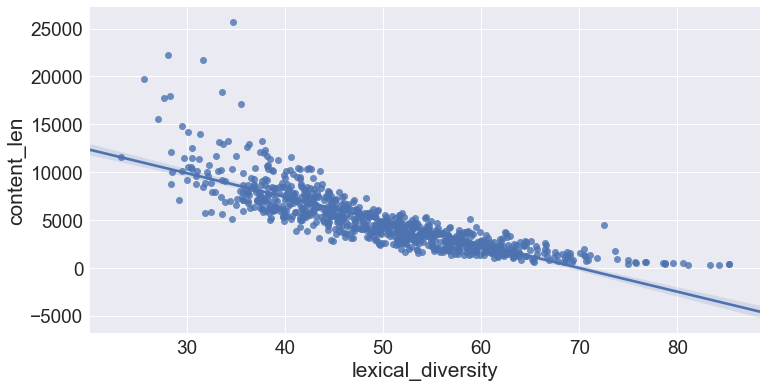

In [79]:
# import matplotlib.pyplot as plt
# import seaborn as sns; sns.set(color_codes=True)
plt.subplots(figsize=(12,6))
short2 = samp[['lexical_diversity','content_len']]
ax = sns.regplot(x="lexical_diversity", y="content_len", data=short2)
plt.show()

In [80]:
# Lexical diversity is highly inversely correlated with read_time (-0.77) and conent_len (-0.82)
# The interesting piece is the relationship between the author comments and staff_flag (0.43)
# However, this might be due to sample data (not actual relationship) or because staff_flag is binary
correlation3 = samp.corr(method='pearson')
correlation3

,comments_count,is_sponsored,read_time,content_len,video_flag,author_comments,tag_count,staff_flag,lexical_diversity
comments_count,1.000000,-0.028236,-0.008260,-0.046295,NaN,0.026651,-0.058026,-0.107097,0.079043
is_sponsored,-0.028236,1.000000,0.081888,0.047542,NaN,-0.096995,-0.052459,-0.103822,-0.037389
read_time,-0.008260,0.081888,1.000000,0.956166,NaN,-0.128941,0.075113,-0.315966,-0.772353
content_len,-0.046295,0.047542,0.956166,1.000000,NaN,-0.157993,0.092089,-0.352151,-0.826926
video_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
author_comments,0.026651,-0.096995,-0.128941,-0.157993,NaN,1.000000,-0.113648,0.435490,0.218430
tag_count,-0.058026,-0.052459,0.075113,0.092089,NaN,-0.113648,1.000000,-0.002457,-0.149091
staff_flag,-0.107097,-0.103822,-0.315966,-0.352151,NaN,0.435490,-0.002457,1.000000,0.489451
lexical_diversity,0.079043,-0.037389,-0.772353,-0.826926,NaN,0.218430,-0.149091,0.489451,1.000000


In [81]:
lex_div = samp[['author_name', 'lexical_diversity'
              ]].groupby(['author_name'
                         ]).agg(['mean','min','max', 'count'])
lex_div

lexical_diversity                    
                                     mean    min    max count
author_name                                                  
Abhishek Talreja                45.210000  45.21  45.21     1
Abhishek V Paul                 42.190000  42.19  42.19     1
Aidil Zulkifli                  39.820000  39.82  39.82     1
Alan Ho                         44.310000  44.31  44.31     1
Alan Seng                       48.880000  42.44  51.65     8
Alexey Samkov                   33.640000  33.64  33.64     1
Alpi Mantri                     51.060000  51.06  51.06     1
Alvin Chan                      38.340000  38.34  38.34     1
Andre Gunawan                   76.811667  64.08  84.21     6
Andrew Krebs-Smith              36.680000  36.68  36.68     1
Andrew Prasatya                 29.730000  29.73  29.73     1
Andrew Rowan                    44.880000  41.27  48.49     2
Angela Gratela                  39.840000  39.54  40.14     2
Anna Haotanto                   45.810000  45.81  45.81     1
Anna Spallino                   52.748462  46.31  60.04    13
Annie Teh                       56.440000  44.73  63.28     3
Anshul Motwani                  37.230000  37.23  37.23     1
Anton Lucanus                   52.920000  52.92  52.92     1
Antony Ma (CISSP ,LLM)          38.140000  38.14  38.14     1
Arash Asli                      41.170000  41.17  41.17     1
Ashley Collie                   47.780000  47.78  47.78     1
Atul Jalan                      40.810000  40.81  40.81     1
Ben Sim                         49.420000  49.42  49.42     1
Benita Lau                      40.290000  40.29  40.29     1
Bjorn Lee                       41.220000  41.22  41.22     1
Brendan Barbato                 34.440000  34.44  34.44     1
Brianne Kimmel                  37.940000  37.94  37.94     1
Casper Sermsuksan               37.330000  37.33  37.33     1
Cat Williams-Treloar            42.900000  42.90  42.90     1
Cecilia Lv                      40.810000  40.81  40.81     1
Celine Wong                     52.530000  52.53  52.53     1
Charmaine de Lazo               44.000000  35.77  49.81     9
Chirag Prajapati                49.870000  49.35  50.39     2
Chris Greenough                 53.350000  53.35  53.35     1
Christina Antonyan              50.950000  50.95  50.95     1
Clarissa Santoso                44.180000  44.18  44.18     1
Clement Vouillon                37.016667  36.24  38.50     3
Cole Schafer                    33.570000  33.57  33.57     1
Crystal Widjaja                 66.400000  66.40  66.40     1
Daniel Lee                      49.048333  36.19  54.66     6
Dannie Li                       35.010000  35.01  35.01     1
Daphne Ng                       53.450000  53.45  53.45     1
Darvin Kurniawan                48.780000  48.78  48.78     1
Dennis Nerush                   34.570000  34.57  34.57     1
Derek Cai                       43.465000  40.38  47.52     4
Devang Mehta                    46.320000  46.32  46.32     1
Durgesh Kaushik                 46.950000  46.95  46.95     1
Elliott Zaagman                 36.470000  33.26  39.68     2
Ethan Tan                       43.225000  42.00  44.45     2
Euleen Chew                     42.950000  42.95  42.95     1
Eva Xiao                        44.846364  32.19  69.04    33
Farheen Gani                    25.640000  25.64  25.64     1
Fariha Imran                    43.420000  43.42  43.42     1
Filbert Richerd Ng Tsai         39.252500  37.66  40.76     4
Gabriel Abeleda                 53.650000  53.65  53.65     1
Georgi Georgiev                 44.340000  44.34  44.34     1
Giovanni Puglisi                51.910000  51.91  51.91     1
Hari Krishnan                   68.220000  68.22  68.22     1
Hari T.N                        44.305000  43.32  45.29     2
Hayk Hakobyan                   50.300000  50.30  50.30     1
Henry Chui                      38.960000  38.96  38.96     1
Hira Saeed                      44.445000  43.39  45.50 

In [82]:
# lex_div.columns = lex_div.columns.droplevel(0)
list(lex_div)

[('lexical_diversity', 'mean'),
 ('lexical_diversity', 'min'),
 ('lexical_diversity', 'max'),
 ('lexical_diversity', 'count')]

In [83]:
lex_div[('lexical_diversity', 'count')]

author_name
Abhishek Talreja             1
Abhishek V Paul              1
Aidil Zulkifli               1
Alan Ho                      1
Alan Seng                    8
Alexey Samkov                1
Alpi Mantri                  1
Alvin Chan                   1
Andre Gunawan                6
Andrew Krebs-Smith           1
Andrew Prasatya              1
Andrew Rowan                 2
Angela Gratela               2
Anna Haotanto                1
Anna Spallino               13
Annie Teh                    3
Anshul Motwani               1
Anton Lucanus                1
Antony Ma (CISSP ,LLM)       1
Arash Asli                   1
Ashley Collie                1
Atul Jalan                   1
Ben Sim                      1
Benita Lau                   1
Bjorn Lee                    1
Brendan Barbato              1
Brianne Kimmel               1
Casper Sermsuksan            1
Cat Williams-Treloar         1
Cecilia Lv                   1
Celine Wong                  1
Charmaine de Lazo          

In [84]:
lex_div[('lexical_diversity', 'mean')][lex_div[('lexical_diversity', 'count')] >=4]

author_name
Alan Seng                  48.880000
Andre Gunawan              76.811667
Anna Spallino              52.748462
Charmaine de Lazo          44.000000
Daniel Lee                 49.048333
Derek Cai                  43.465000
Eva Xiao                   44.846364
Filbert Richerd Ng Tsai    39.252500
Hui Min Cheong             61.442857
Jack Ellis                 55.642531
Jay Kim                    36.086667
Jia Xin Lim                53.728462
Joe Liebkind               48.048182
Judith Balea               54.460000
Luigi Leonardo             46.888000
Malavika Velayanikal       44.078400
Michael Tegos              50.452750
Nadine Freischlad          55.224231
Pearl Lee                  42.418000
Raja Jamalamadaka          41.780000
Regina Lin                 62.072222
Rita Liao                  43.927500
Steven Millward            58.857467
Sumit Chakraberty          45.751034
Terence Lee                54.838000
Tim Romero                 38.986250
Wei Min Ong               

In [85]:
df2 = lex_div[('lexical_diversity', 'mean')][lex_div[('lexical_diversity', 'count')] >=5].reset_index()
df2.columns = df2.columns.droplevel(0)
df2.columns = ['author_name', 'avg_lexical_diversity']
list(df2)


['author_name', 'avg_lexical_diversity']

In [86]:
test2 = df2.sort_values(['avg_lexical_diversity'], ascending=[False])
test2

,author_name,avg_lexical_diversity
1,Andre Gunawan,76.811667
17,Regina Lin,62.072222
6,Hui Min Cheong,61.442857
18,Steven Millward,58.857467
7,Jack Ellis,55.642531
15,Nadine Freischlad,55.224231
20,Terence Lee,54.838000
11,Judith Balea,54.460000
9,Jia Xin Lim,53.728462
2,Anna Spallino,52.748462


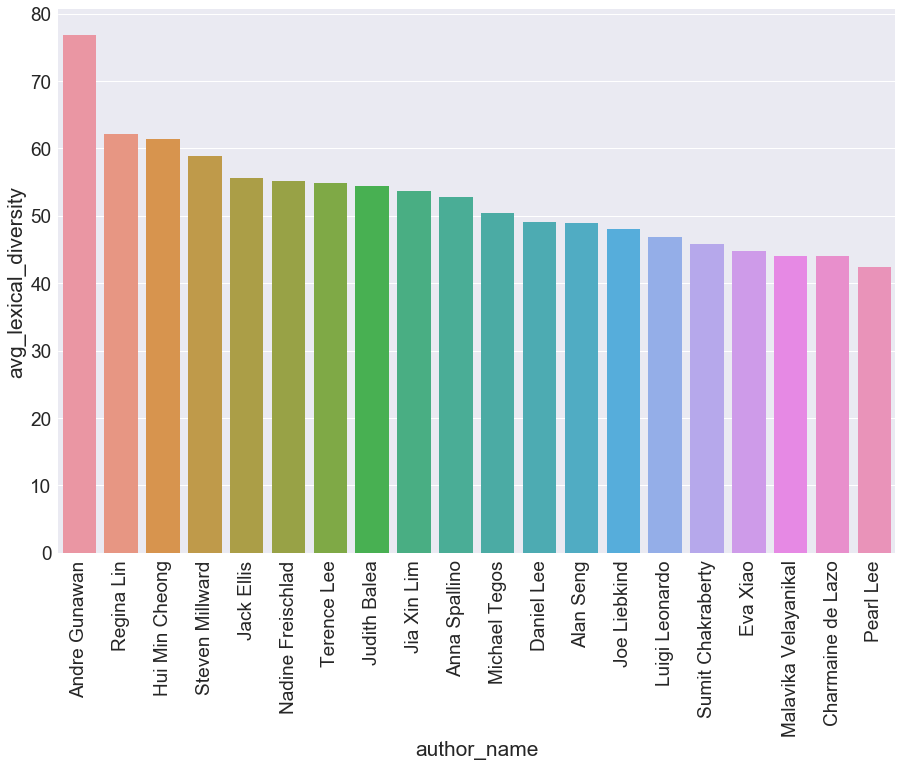

In [87]:
import seaborn as sns
plt.subplots(figsize=(15,10))
sns.set_style("whitegrid")
sns.set(font_scale=1.9)
ax = sns.barplot(x="author_name", y="avg_lexical_diversity", data=test2[:20]) 
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [88]:
from collections import Counter
from nltk.corpus import stopwords

def count_wrds(words): 
    stop_words = set(stopwords.words('english'))
    words2 = Counter(w.title() for w in words if w.lower() not in stop_words.words())
    return words2.most_common()

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(samp['clean_content'])
frequencies = sum(sparse_matrix).toarray()[0]
freq_wrds = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [90]:
freq_wrds

,frequency
aaa,1
aaaaaaaaand,1
aaairznxmx,1
aadhaar,8
aadhar,2
aakrit,1
aamulya,1
aaron,3
aarrr,4
abandon,5


In [91]:
df3 = freq_wrds.reset_index()
df3.columns = ['words', 'words_freq']
list(df3)

['words', 'words_freq']

In [92]:
# This list has a lot of stop words. Need to remove them
test3 = df3.sort_values(['words_freq'], ascending=[False])
test3

,words,words_freq
20734,the,29493
20995,to,20196
791,and,17901
10025,in,14572
14239,of,13992
10727,is,7796
7804,for,7016
20731,that,6977
10771,it,6345
22904,with,5216


#### Remove Stop Words

In [93]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [94]:
words2 = [w for w in test3.words if not w in stop_words]

In [95]:
# Much Better
test4 = test3[test3['words'].isin(words2)]
test4

,words,words_freq
22025,us,3471
651,also,1880
20506,tech,1849
19553,startup,1818
3943,company,1793
1199,asia,1787
14328,one,1668
13054,million,1628
11954,like,1543
4631,credit,1514


#### I just feel like every analysis needs a word cloud :) 
In all seriousness, this is a basic word cloud. It does not really add much to the analysis other than showing the focus of the articles which can be seen in words like: 
startup, million, new, product, market, people, credit, funding
It would be interesting to compare the mission statement of Tech In Asia with what the word cloud shows. 

In [97]:
from wordcloud import WordCloud

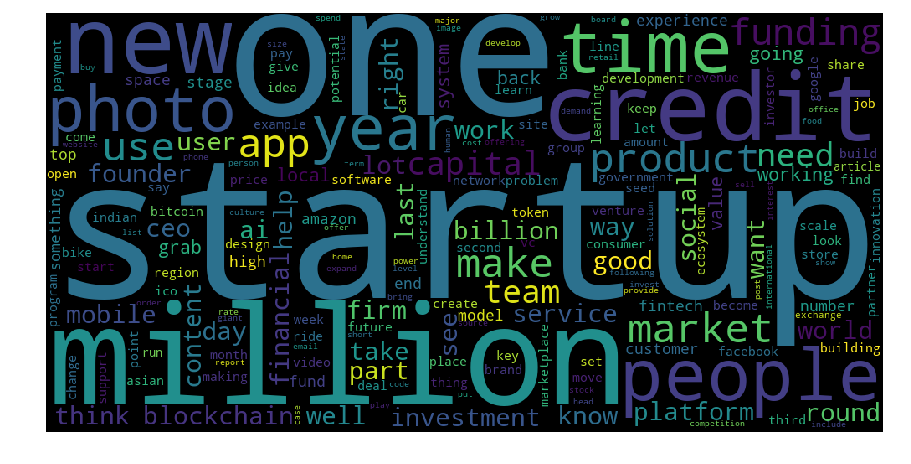

In [98]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(test4['words']))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)

plt.axis("off")

plt.show()

### Hope You Enjoyed It
# The End
<br>
[Click Here To Go Back To The Top](#home)